In [1]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

Using Theano backend.


In [2]:
net = Network("MNIST")
net.add(Layer("input", shape=784, vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Layer("hidden1", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("hidden2", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("output", shape=10, activation='softmax'))

net.connect('input', 'hidden1')
net.connect('hidden1', 'hidden2')
net.connect('hidden2', 'output')

In [3]:
net.compile(loss='mean_squared_error',
            optimizer='sgd')

In [4]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

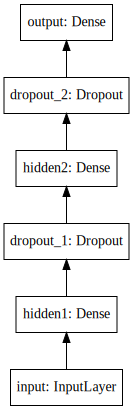

In [5]:
SVG(model_to_dot(net.model, rankdir="BT").create_svg())

In [6]:
net.load_mnist_dataset()
#net.rescale_inputs((0,255), (0,1), 'float32')
#net.shuffle_dataset()
net.slice_dataset(0, 100)
net.reshape_inputs(784)
#net.split_dataset(100)

Input Summary:
   length  : 70000
   training: 70000
   testing : 0
   shape  : [0]
   range  : (0.0, 1.0)
Target Summary:
   length  : 70000
   training: 70000
   testing : 0
   shape  : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
   range  : (0.0, 1.0)
Input Summary:
   length  : 100
   training: 100
   testing : 0
   shape  : [0]
   range  : (0.0, 1.0)
Target Summary:
   length  : 100
   training: 100
   testing : 0
   shape  : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
   range  : (0.0, 1.0)
Input data shape: (784,), range: (0.0, 1.0), type: float32


In [7]:
widget = net.make_widget()

<IPython.core.display.Javascript object>

In [8]:
widget

In [9]:
net.train(1000, report_rate=5, verbose=0)
#net.test()

(1000, 0.090965688228607178, 0.11999999731779099, 0.0)

In [13]:
import time
for i in range(10):
    net.propagate(net.get_input(i))
    time.sleep(1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [1]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

Using Theano backend.


In [2]:
net = Network("MNIST-CNN")
net.add(Layer("input", (28,28,1), vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Conv2DLayer("Conv2D-1", 16, (5,5), activation="relu"))
net.add(MaxPool2DLayer("maxpool1", (2,2)))
net.add(Conv2DLayer("Conv2D-2", 132, (5,5), activation="relu")) 
net.add(MaxPool2DLayer("maxpool2", (2,2)))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden", 1000, activation='relu'))
net.add(Layer("output", 10, activation='softmax'))

net.connect()

In [3]:
net.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [4]:
net.load_mnist_dataset()

Input Summary:
   length  : 70000
   training: 70000
   testing : 0
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   length  : 70000
   training: 70000
   testing : 0
   shape  : (10,)
   range  : (0.0, 1.0)


In [5]:
net.slice_dataset(100)

Slicing dataset 0:100...
Input Summary:
   length  : 100
   training: 100
   testing : 0
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   length  : 100
   training: 100
   testing : 0
   shape  : (10,)
   range  : (0.0, 1.0)


In [6]:
net.train()

Training...
Epoch 1/1
100/100 [==============================] - 0s - loss: 0.3249 - acc: 0.9000
Epoch #    1 | train loss 0.32486 | train acc 0.90000 | validate% 0.00000


In [1]:
import conx

Using Theano backend.


In [2]:
network = conx.Network("Sample")

In [3]:
network.load_mnist_dataset()

AttributeError: 'Network' object has no attribute 'mult_targets'

In [4]:
len(network.train_inputs)

70000

In [7]:
network.inputs.shape[0]

70000

In [4]:
len(network.targets)

70000

In [5]:
network.summary_dataset()

28 train inputs, 0 test inputs
Set 28 inputs and targets
Input data shape: (28, 28, 1), range: (0.0, 1.0)
Target data shape: (10,), range: (0.0, 1.0)
